<a href="https://colab.research.google.com/github/ArielMAs/arielmas.github.io/blob/main/src/youtuve-proj/YouTube_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  YouTube Project: Analyzing freeCodeCamp Comments

# Summary

This project focuses on analyzing comments from [freeCodeCamp's YouTube channel]('https://www.youtube.com/c/Freecodecamp') to uncover insights about viewer sentiment and key topics of discussion. By leveraging the [YouTube Data API]('https://developers.google.com/youtube/v3'), we gathered video and comment data, which was then preprocessed to remove noise such as punctuation, stopwords, and emojis. We used sentiment analysis with a **BERTweet** model to classify the sentiment of each comment, and applied **BERTopic** for topic modeling to identify recurring themes across the comments.

The project aims to provide a deeper understanding of how viewers interact with freeCodeCamp content, what topics are of interest to them, and how they feel about the videos. This aligns with the concept of **social listening**, which involves monitoring and analyzing online conversations to gain insights into public opinion, identify trends, and understand the emotional tone surrounding specific topics or brands.

## What is Social Listening?

Social listening refers to the process of monitoring digital conversations to understand what is being said about a brand, product, or topic on social media platforms and other online spaces. It involves gathering data from sources like social media comments, blog posts, and forums, and analyzing it to gain actionable insights. Social listening can help identify consumer sentiments, emerging trends, and feedback that can inform marketing strategies, product development, and customer engagement efforts.

In the context of this project, social listening is applied by analyzing YouTube comments on freeCodeCamp’s videos. The sentiment and topic modeling results provide valuable feedback on how the audience is responding to the content. By understanding these dynamics, we can assess the effectiveness of freeCodeCamp's educational videos and recognize areas for improvement or growth.

It is important to note that this analysis is based on a small sample of data due to API limits. The data collected represents only a subset of the videos and comments from freeCodeCamp’s YouTube channel. This sample was extracted to demonstrate the process, but a more comprehensive analysis could be performed with broader data access.

# Next Steps: Streamlit Dashboard

The next step in this project is to build an interactive **Streamlit dashboard** that allows users to explore the insights generated from the sentiment analysis and topic modeling. The dashboard will display:

1. **Sentiment Distribution**: Visual representations of the sentiment breakdown (positive, negative, neutral) across comments.
2. **Topic Exploration**: A visual interface to explore the topics discussed in the comments, with the ability to view representative documents for each topic.
3. **Word Cloud Visualizations**: Word clouds for different sentiment categories (positive, negative, neutral) to highlight key terms and phrases.
4. **Trends Over Time**: Analysis of how sentiment and topics have evolved over time, correlating with the video release schedule.

By incorporating these features, the dashboard will provide an accessible and insightful way for users to explore the data and better understand the audience's reactions to freeCodeCamp’s content. This aligns with the objectives of social listening by offering actionable insights into audience engagement and sentiment.

# Opportunities for Improving Accuracy and Insights

To further improve the accuracy and richness of the analysis, several enhancements could be implemented:

1. **Larger Sample Size**: The current analysis is based on a small sample due to API limits. Expanding the sample size to cover a broader range of videos and comments would provide a more representative overview of the audience's sentiments and topics.
2. **Multilingual Comment Handling**: Given that some comments may be in languages other than English, incorporating models that can handle multilingual data would provide a more accurate analysis. Alternatively, translating non-English comments into English before processing would ensure that all data is included in the sentiment and topic modeling.
3. **Contextual Sentiment Analysis**: Using more advanced sentiment analysis models that consider context (such as sarcasm detection) could improve the accuracy of sentiment classification. The current model is focused on general sentiment, but incorporating more specialized models could lead to more nuanced results.
4. **Fine-tuning on Domain-Specific Data**: Fine-tuning the sentiment analysis and topic modeling models on domain-specific datasets (e.g., comments from YouTube educational channels) could improve the relevance and accuracy of the results.
5. **Incorporating Video Metadata**: In addition to comments, incorporating metadata such as video views, like/dislike ratios, and engagement metrics could provide more context for analyzing how the video content itself influences sentiment and topics.
6. **Sentiment Over Time**: Analyzing how sentiment changes over time in relation to video release dates, audience feedback, or specific events (such as updates to the freeCodeCamp curriculum) could provide deeper insights into trends and audience engagement.

By implementing these enhancements, the results of the project could be made even more robust, accurate, and actionable, providing better insights for content creators and educators looking to improve engagement with their audience.

In [2]:
#!pip install emoji
#!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu

In [3]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
from transformers import pipeline
from bertopic import BERTopic
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import string
from PIL import Image
from googleapiclient.discovery import build
import time
import random
import plotly.express as px
from google.colab import files
from collections import Counter
from IPython.display import display, Markdown


# Download NLTK resources (run only once)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Fetch data from API

In [ ]:
import time
import random
import pandas as pd
from googleapiclient.errors import HttpError

# Set up YouTube API credentials
api_key = ""
youtube = build("youtube", "v3", developerKey=api_key)

# Define the channel ID for freeCodeCamp
channel_id = "UC8butISFwT-Wl7EV0hUK0BQ"  # freeCodeCamp.org YouTube Channel ID

# Function to fetch videos from the channel
def fetch_comments(video_id, max_comments=50):
    comments = []
    next_page_token = None
    comment_count = 0

    while comment_count < max_comments:
        try:
            request = youtube.commentThreads().list(
                part="snippet", videoId=video_id, textFormat="plainText", maxResults=100, pageToken=next_page_token
            )
            response = request.execute()

            for item in response['items']:
                comment_data = {
                    'Comment': item['snippet']['topLevelComment']['snippet']['textDisplay'],
                    'Author': item['snippet']['topLevelComment']['snippet']['authorDisplayName'],
                    'Comment ID': item['snippet']['topLevelComment']['id'],
                    'Published At': item['snippet']['topLevelComment']['snippet']['publishedAt']
                }
                comments.append(comment_data)
                comment_count += 1
                if comment_count >= max_comments:
                    break

            next_page_token = response.get('nextPageToken')
            if not next_page_token:
                break

            time.sleep(random.uniform(1, 3))  # Add random delay to reduce API load

        except HttpError as e:
            if e.resp.status == 403:  # Quota exceeded error
                print("Quota exceeded while fetching comments. Stopping the data collection.")
                return pd.DataFrame(comments)  # Return whatever has been collected so far
            else:
                print(f"Error fetching comments for video {video_id}: {e}")
                time.sleep(10)  # If an error occurs, wait before retrying

    return pd.DataFrame(comments)

def fetch_videos(channel_id, max_videos=100):
    videos = []
    request = youtube.channels().list(part="contentDetails", id=channel_id)
    response = request.execute()

    playlist_id = response['items'][0]['contentDetails']['relatedPlaylists']['uploads']
    next_page_token = None
    video_count = 0

    while video_count < max_videos:
        try:
            request = youtube.playlistItems().list(
                part="snippet", playlistId=playlist_id, maxResults=50, pageToken=next_page_token
            )
            response = request.execute()

            for item in response['items']:
                video_data = {
                    'Video Title': item['snippet']['title'],
                    'Video ID': item['snippet']['resourceId']['videoId'],
                    'Published At': item['snippet']['publishedAt'],
                    'Description': item['snippet']['description'],
                    'Video URL': f"https://www.youtube.com/watch?v={item['snippet']['resourceId']['videoId']}"
                }
                videos.append(video_data)
                video_count += 1
                if video_count >= max_videos:
                    break

            next_page_token = response.get('nextPageToken')
            if not next_page_token:
                break

            time.sleep(random.uniform(1, 3))  # Avoid exceeding rate limits

        except HttpError as e:
            if e.resp.status == 403:  # Quota exceeded error
                print("Quota exceeded while fetching videos. Stopping the data collection.")
                return pd.DataFrame(videos)  # Return whatever has been collected so far
            else:
                print(f"Error fetching videos: {e}")
                time.sleep(10)  # If an error occurs, wait before retrying

    return pd.DataFrame(videos)

# Collect video data (limit to 50 videos for quota safety)
videos_df = fetch_videos(channel_id, max_videos=500)
print(f"Collected {len(videos_df)} videos.")

# Collect comments for each video (limit to 30 comments per video)
comments_df = pd.DataFrame(columns=['Comment', 'Author', 'Comment ID', 'Published At', 'Video ID'])
for video_id in videos_df['Video ID']:
    print(f"Fetching comments for video {video_id}")
    video_comments_df = fetch_comments(video_id, max_comments=500)

    if not video_comments_df.empty:
        video_comments_df['Video ID'] = video_id
        comments_df = pd.concat([comments_df, video_comments_df], ignore_index=True)

    # Save collected data at each step to avoid losing progress
    videos_df.to_csv("freecodecamp_videos.csv", index=False)
    comments_df.to_csv("freecodecamp_comments.csv", index=False)

    # If quota is exceeded, break out of the loop
    if video_comments_df.empty:
        break

print(f"Collected {len(comments_df)} comments.")


In [4]:
from google.colab import files
files.download('freecodecamp_videos.csv')
files.download('freecodecamp_comments.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data cleaning

In [4]:
comments_df = pd.read_csv('freecodecamp_comments.csv')

In [5]:
videos_df = pd.read_csv('freecodecamp_videos.csv')

In [6]:
comments_df.head()

,Comment,Author,Comment ID,Published At,Video ID
0,0:00 Just watching the video to learn english:...,@ottomuller6222,UgxISJ37o8HPk4i1OXZ4AaABAg,2025-03-20T15:08:01Z,wuVVclLcjuA
1,COBOL,@justwanderin847,Ugwpn4yQ0SAXS6ntXDt4AaABAg,2025-03-20T14:28:05Z,wuVVclLcjuA
2,you know what’s wild? that somebody has to exp...,@thghtfl,UgzAfOj88p7zjs4XNoV4AaABAg,2025-03-20T13:17:16Z,wuVVclLcjuA
3,I really like the advanced voice mode of the C...,@Ph34rNoB33r,UgxrQ_ykBj_mr36ED8V4AaABAg,2025-03-20T12:34:33Z,wuVVclLcjuA
4,"Well done Boris, great accent for a teacher.",@evgenymagidson4434,UgweXFBBkw4B6Aru9Ax4AaABAg,2025-03-20T11:54:53Z,wuVVclLcjuA


In [7]:
videos_df.head()

,Video Title,Video ID,Published At,Description,Video URL
0,"Learn ANY Language with AI (Learn English, Lea...",wuVVclLcjuA,2025-03-19T15:53:38Z,"Discover how to master any language, including...",https://www.youtube.com/watch?v=wuVVclLcjuA
1,Build a Full Stack AI Note Taking App with Nex...,6ChzCaljcaI,2025-03-18T15:12:29Z,Build a full-stack note-taking app with the Ne...,https://www.youtube.com/watch?v=6ChzCaljcaI
2,How to become a self-taught developer while su...,28c0QMQZ5yA,2025-03-14T22:04:40Z,"On this week's episode of the podcast, freeCod...",https://www.youtube.com/watch?v=28c0QMQZ5yA
3,AWS Cognito Course – Authentication and Author...,ajExOgOCJXY,2025-03-13T14:37:57Z,This comprehensive AWS Cognito course covering...,https://www.youtube.com/watch?v=ajExOgOCJXY
4,JavaScript Essentials Course,876aSEUA_8c,2025-03-12T18:06:03Z,Learn JavaScript essentials with this course t...,https://www.youtube.com/watch?v=876aSEUA_8c


In [8]:
stop_words = set(stopwords.words('english'))


In [9]:
def preprocess_text(text):
  """
    Preprocesses text by removing punctuation, converting to lowercase, and removing stopwords.

    Args:
        text (str): The text to preprocess.

    Returns:
        str: The preprocessed text.
    """
  if pd.isna(text):
    return None
  else:
    # Remove punctuation and convert to lower case
    text = text.translate(str.maketrans("", "", string.punctuation)).lower()
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text


# Apply preprocessing to the 'Comment' column
comments_df['Processed_Text'] = comments_df['Comment'].apply(preprocess_text)

In [10]:
def translate_emojis(text):
  """
  Translates emojis in text to their textual descriptions.

  Args:
      text (str): The text containing emojis.

  Returns:
      str: The text with emojis translated.
  """
  if pd.isna(text):
    return None
  else:
    return emoji.demojize(text)#.replace(":", " ")

In [11]:
# Apply demojize to the entire 'Comment' column
comments_df['Comment_no_emojis'] = comments_df['Processed_Text'].apply(lambda text: translate_emojis(text))

Missing values

In [12]:
videos_df.isnull().sum()

,0
Video Title,0
Video ID,0
Published At,0
Description,12
Video URL,0


In [13]:
comments_df.isnull().sum()

,0
Comment,35
Author,45
Comment ID,0
Published At,0
Video ID,0
Processed_Text,35
Comment_no_emojis,35


In [14]:
#Lets remove the rows with missing comments
comments_df = comments_df.dropna()

In [15]:
#Extract date
comments_df['Published_date'] = pd.to_datetime(comments_df['Published At']).dt.date
videos_df['Published_date'] = pd.to_datetime(videos_df['Published At']).dt.date

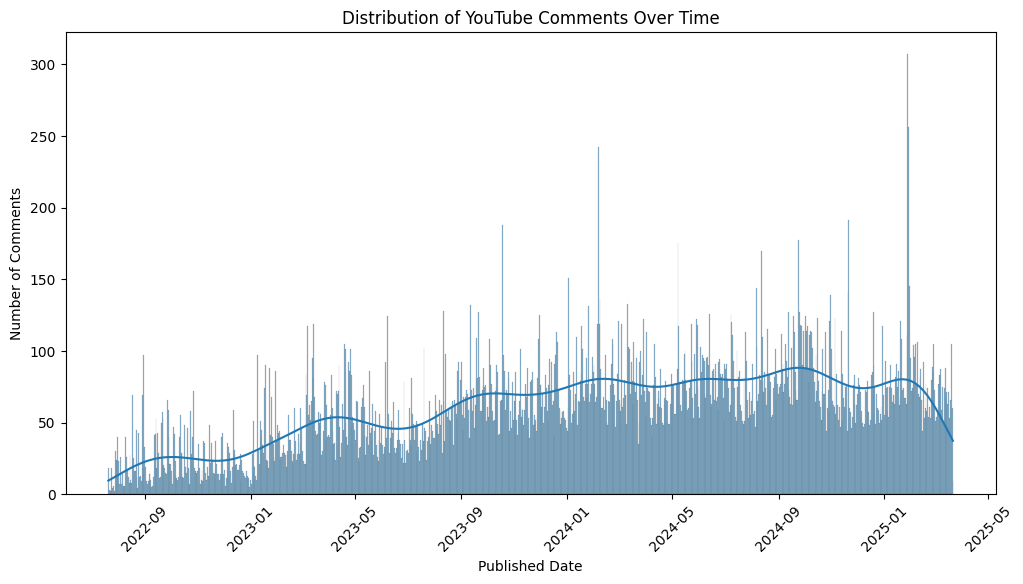

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(comments_df['Published_date'], bins=50, kde=True)
plt.xlabel("Published Date")
plt.ylabel("Number of Comments")
plt.title("Distribution of YouTube Comments Over Time")
plt.xticks(rotation=45)
plt.show()

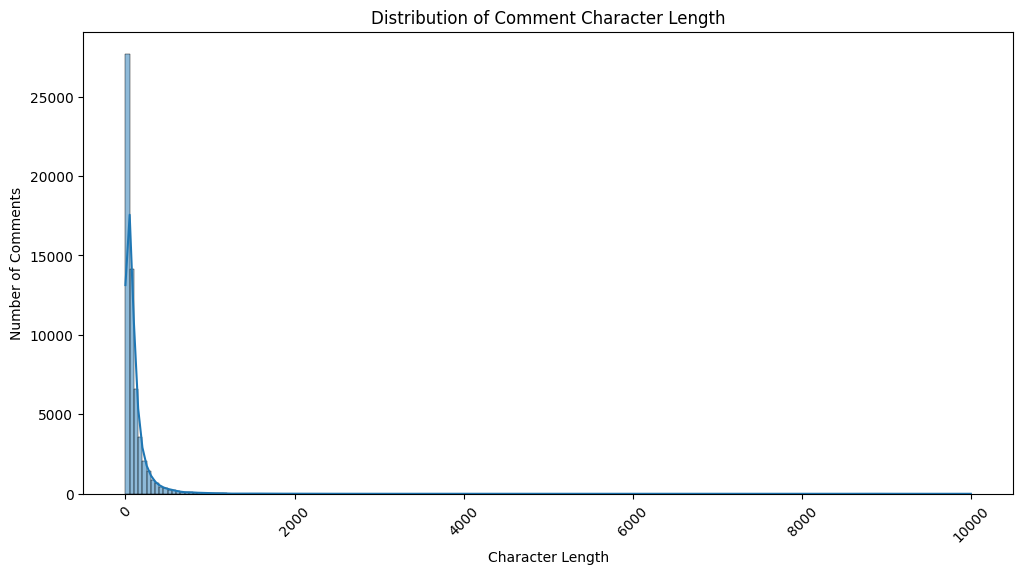

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(comments_df.Comment.apply(len), bins=200, kde=True)
plt.xlabel("Character Length")
plt.ylabel("Number of Comments")
plt.title("Distribution of Comment Character Length")
plt.xticks(rotation=45)
plt.show()

In [18]:
comments_df.Comment.apply(len).describe()#Comment length

,Comment
count,59436.000000
mean,118.133589
std,344.995777
min,1.000000
25%,25.000000
50%,56.000000
75%,117.000000
max,9993.000000


In [19]:
def wc_preprocess_text(text):
  # Remove punctuation and convert to lower case
  text = text.translate(str.maketrans("", "", string.punctuation)).lower()
  # Initialize lemmatizer
  lemmatizer = WordNetLemmatizer()

  # Tokenize the text
  tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase

  # Lemmatize the tokens
  tokens = [lemmatizer.lemmatize(word) for word in tokens if not word.isnumeric()]
  return tokens

In [20]:
comments_df['processed_text_tokens'] = comments_df['Processed_Text'].apply(wc_preprocess_text)

In [21]:
# Flatten the list of tokens
all_words = [word for tokens in comments_df['processed_text_tokens'] for word in tokens]

# Count word occurrences
word_counts = Counter(all_words)

# Get the top 10 most common words
top_10_words = word_counts.most_common(10)

In [22]:
display(Markdown(f"#### Descriptive Statistics"))
display(Markdown(f"##### Key Metrics"))

display(Markdown(f"* Total Comments Analyzed: {len(comments_df)} for {len(videos_df)} videos, which is equal to around {round(len(comments_df)/len(videos_df),2)} comments per video"))
display(Markdown(f"*  Date Range of Comments: {comments_df['Published_date'].min()} to {comments_df['Published_date'].max()}"))
display(Markdown(f"* Unique Users: {len(comments_df['Author'].unique())}"))
display(Markdown(f"* Average Comment Length: {comments_df.Comment.apply(len).mean().astype(int)} characters"))
display(Markdown(f"* Most Frequent Words:"))
display(pd.DataFrame(top_10_words,columns=['Word','Count']))


#### Descriptive Statistics

##### Key Metrics

* Total Comments Analyzed: 59436 for 500 videos, which is equal to around 118.87 comments per video

*  Date Range of Comments: 2022-07-21 to 2025-03-21

* Unique Users: 47864

* Average Comment Length: 118 characters

* Most Frequent Words:

,Word,Count
0,video,7408
1,course,7203
2,thank,5736
3,thanks,4776
4,like,4491
5,code,3814
6,tutorial,3726
7,great,3374
8,please,3250
9,much,3194


##### Conclusion
The descriptive statistics provide a quantitative overview of the dataset, highlighting engagement levels and common patterns in comment length and vocabulary usage.


Word Cloud

In [23]:
def bag_of_words_tokens_to_string(tokens):
  # Flatten the list and join items with a space
  flattened_string = ' '.join([item for sublist in tokens for item in sublist])
  return flattened_string


In [24]:
comment_mask = np.array(Image.open('./comment_mask.png'))

In [25]:
def plot_bag_of_words(data=comments_df,sentiment='ALL',colormap = 'BuPu_r'):
  # Generate the word cloud
  if sentiment == 'ALL':
    bag_of_wrods_string = bag_of_words_tokens_to_string(list(data['processed_text_tokens']))
  else:
    sent_tokens_dict = {'POS':list(data[data['Sentiment_label']=='POS']['processed_text_tokens']),
                    'NEG':list(data[data['Sentiment_label']=='NEG']['processed_text_tokens']),
                    'NEU':list(data[data['Sentiment_label']=='NEU']['processed_text_tokens'])}
    bag_of_wrods_string = bag_of_words_tokens_to_string(sent_tokens_dict[sentiment])
  wordcloud = WordCloud(background_color = 'white', mask = comment_mask, contour_width = 2,
      contour_color = 'black', colormap = colormap, width = 800, height = 500).generate(bag_of_wrods_string)
  plt.imshow(wordcloud)
  plt.axis("off")
  return wordcloud


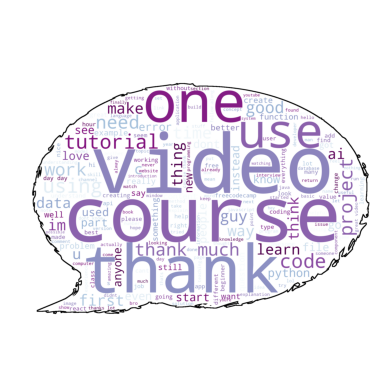

In [26]:
all_cloud = plot_bag_of_words()

In [27]:
all_cloud.to_file("wordcloud_all.png")

# Sentiment analysis

Using **`bertweet-base-sentiment-analysis`** helps classify comments as **positive (POS), negative (NEG), or neutral (NEU)** [Pérez et al., 2021](https://arxiv.org/abs/2106.09462).



## Why Use This Model?  
- **Trained on social media** - Handles slang, emojis, and informal text.  
- **Easy to use with Hugging Face Pipelines**.

In [28]:
sentiment_pipeline = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

Device set to use cpu


## Handling Emojis in Sentiment Analysis  

Emojis can impact sentiment classification. Let's compare how the model classifies text **with emojis vs. after emoji translation**.  

In [29]:
def detect_emojis(text):
  emoji_list = [char for char in text if emoji.is_emoji(char)]
  return len(emoji_list)>0

In [30]:
text_with_emoji_list = [text for text in comments_df['Processed_Text'].astype(str) if detect_emojis(text)]
print(f'{len(text_with_emoji_list)}({round(len(text_with_emoji_list)/len(comments_df),2)*100}%) comments have at least one emojis')

9328(16.0%) comments have at least one emojis


In [31]:
sentiment_without_emoji = []
sentiment_with_emoji = []
comment = []
for idx,row in comments_df.iterrows():
  text_with_emojis = row['Processed_Text']
  text_without_emojis = row['Comment_no_emojis']
  if detect_emojis(text_with_emojis):
    sent_without = sentiment_pipeline([text_without_emojis],truncation=True)
    sent_with = sentiment_pipeline([text_with_emojis],truncation=True)
    sentiment_without_emoji.append(sent_without[0]['label'])
    sentiment_with_emoji.append(sent_with[0]['label'])
    comment.append(row['Comment'])

In [32]:
emoji_sent_comapre_df = pd.DataFrame({'Comment':comment,'Sentiment_without_emoji':sentiment_without_emoji,'Sentiment_with_emoji':sentiment_with_emoji})

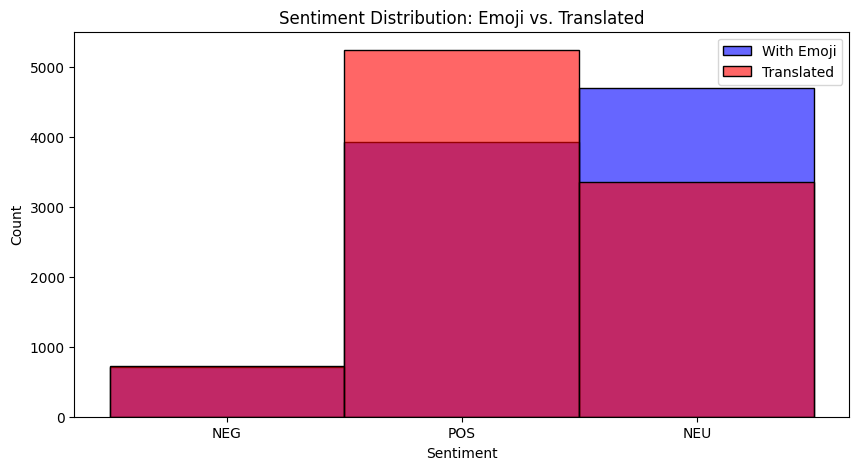

In [33]:
#Plot the sentiment distributions for texts with emojis versus those without emojis.
plt.figure(figsize=(10,5))
sns.histplot(emoji_sent_comapre_df["Sentiment_with_emoji"], label="With Emoji", color="blue", alpha=0.6)
sns.histplot(emoji_sent_comapre_df["Sentiment_without_emoji"], label="Translated", color="red", alpha=0.6)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution: Emoji vs. Translated")
plt.legend()
plt.show()

In [34]:
#Lets get a clear view of the sentiment transitions between with and without emojis
tras_value = {
    'NEU':{'POS':0,'NEG':0},
    'POS':{'NEG':0,'NEU':0},
    'NEG':{'POS':0,'NEU':0}
}

for idx,row in emoji_sent_comapre_df.iterrows():
  if row['Sentiment_with_emoji']!=row['Sentiment_without_emoji']:
    tras_value[row['Sentiment_with_emoji']][row['Sentiment_without_emoji']] += 1

# 'tras_value' is a dictionary that keeps track of the transitions in sentiment labels between two columns:
# 'Sentiment_with_emoji' and 'Sentiment_without_emoji'. The dictionary stores the count of how often
# a specific sentiment changes from one category to another (from 'with emoji' to 'without emoji').
# The structure is as follows:
#   - 'NEU' -> Neutral sentiment
#   - 'POS' -> Positive sentiment
#   - 'NEG' -> Negative sentiment
#
# For example, if a sentiment with an emoji is 'POS' and the sentiment without an emoji is 'NEG',
# 'tras_value['POS']['NEG']' will increment by 1, indicating that a positive sentiment with an emoji
# transitions to a negative sentiment without the emoji.

tras_value

{'NEU': {'POS': 1351, 'NEG': 201},
 'POS': {'NEG': 6, 'NEU': 59},
 'NEG': {'POS': 26, 'NEU': 157}}

In [35]:
# Let's look at some examples of sentiment transitions
emoji_non_emoji_sentiment_change = emoji_sent_comapre_df[emoji_sent_comapre_df['Sentiment_without_emoji']!=emoji_sent_comapre_df['Sentiment_with_emoji']].sample(n=100)
for idx,row in emoji_non_emoji_sentiment_change.iterrows():
  print(f"Comment {idx}: {row['Comment']}")
  print(f'Sentiment without emoji: {row["Sentiment_without_emoji"]}')
  print(f'Sentiment with emoji: {row["Sentiment_with_emoji"]}')

Comment 9187: HTML has never been this beautifully explained since it was created... thanks ❤
Sentiment without emoji: POS
Sentiment with emoji: NEG
Comment 4257: I clicked on this video by accident now I'm like 1 hour in and I'm hooked 😮
Sentiment without emoji: POS
Sentiment with emoji: NEU
Comment 9052: 1:54:46 is not quite true (20 + 50 / 2 ) = (50 / 2) + 20 

Thanks for this Video 🎉
Sentiment without emoji: POS
Sentiment with emoji: NEU
Comment 2719: One course on Ruby on Rails as backend and Nextjs + Postgresql please 😊
Sentiment without emoji: POS
Sentiment with emoji: NEU
Comment 6014: Best Go tutorial 💖💖💖💖, I wish I can donate to help this Tutor make more of the tutorial 🌝
Sentiment without emoji: POS
Sentiment with emoji: NEU
Comment 3020: Can we get the machine learning course in java please 😊
Sentiment without emoji: POS
Sentiment with emoji: NEU
Comment 1534: why no captions?? 🤕
Sentiment without emoji: NEG
Sentiment with emoji: NEU
Comment 3385: ❤
Sentiment without emoji:

A great example of why translating emojis instead of leaving them as-is (or removing them) is beneficial can be seen in the following cases:

* The comment "Deepseek gonna takeover everything soon 😢" transitioned from Neutral to Negative after the emoji was translated.

* Similarly, "Hi, I started this course about a week ago and I am having a bit of trouble with the SQL intermediate phase and would really appreciate some assistance 😢" shifted from Neutral to Negative once the emoji was translated.

* Some comments containing only an emoji, like "❤," seemed to transition from Neutral to Positive/Negative after the emoji was translated.

**It appears that translating the emojis improved performance, with most changes occurring from Neutral to either Positive or Negative. This suggests that translating the emoji helps the model correctly understand the context of comments with emojis.**

In [36]:
non_emoji_docs = list(comments_df.Comment_no_emojis)

In [37]:
#Long texts will be be truncuated
comments_df['Sentiment'] = sentiment_pipeline(non_emoji_docs,truncation=True)

In [38]:
comments_df['Sentiment_label'] = comments_df['Sentiment'].apply(lambda x: x['label'])
comments_df['Sentiment_score'] = comments_df['Sentiment'].apply(lambda x: x['score'])

In [39]:
sent_freq = comments_df['Sentiment_label'].value_counts().reset_index()
sent_freq['p'] = sent_freq['count']/sent_freq['count'].sum()

fig = px.pie(sent_freq, values='p', names='Sentiment_label', title='Percentage of comments by sentiment category')
fig.write_html("percentage_of_comments_by_sentiment.html")
fig.show()

In [40]:
files.download('percentage_of_comments_by_sentiment.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Let's look at some examples of each sentiment

## POS: Example documents

Example 0: Brilliantly explained tutorials by a brilliant tutor.
Example 1: Thank you so much sir
Example 2: This is actually a very good course, you start from Kotlin basics to learn how to manage android widgets through the designer and XML and build a quiz app with interesting interactivity. I highly recommend this course for anyone wanting to learn the basics of Android Development (which is not that easy, to be honest), I know this would sound crazy, but I think you should know the basics of HTML and CSS (especially flex) to grasp some of the concepts around XML and make the UI design easier to understand.
Example 3: Thanks a lot for your presentaion, from your video I can understand and drive zustand to manage the react state. From my understanding, it generates  a private memory area in the brower side where various types of object and values as well as function can be operated in this memory block. and It can be accessed by outside components.  very good job Niklas.
Example 4: 

## POS: Word cloud

## NEG: Example documents

Example 0: I need a English subtitles because I'm so weak in English listening 🎧
Example 1: I never coded before, do you recommend this for first-time users. Or should I watch something else?
Example 2: Oh boy, with all due respect, can we move away from redux already? It's overcomplicated global object all in all
Example 3: Man I’ve watched the first like hour of this video multiple times and I can’t keep up or understand anything. Normal speed is too fast and .75 speed is just ridiculous sounding you can’t focus on anything. I really wish even just the keywords and vocabulary was elaborated.
Example 4: SyntaxError: Unexpected token u in JSON at position 0
    at JSON.parse, who got this error ?
Example 5: I can't believe how detailed and well explained the backend part is but the frontend is completely opposite T T
Example 6: The Spotify dev page has changed considerably and feel its extremely difficult to follow this class now.
Example 7: People with common sense don't need this.
Ex

## NEG: Word cloud

## NEU: Example documents

Example 0: Exquisito prro.
Example 1: Bahut jyada Hindi ho gya
Example 2: Thank you to the dean of YouTube.
Example 3: i am getting com.mongodb.MongoSocketOpenException: Exception opening socket    .can anyone help
Example 4: 5:55:50
Example 5: Video overall was very informative, but I just wanted to added that the SQL queries for the some questions were not according to the demand of some of the questions. Rest of the video was very informative.
Example 6: 2:05:44
Example 7: Well bois.. So it begins. Goal is to get it done in 2 weeks.
Day 1: 3 hours in!
Day 3: 3 hours 10 mins in
Day 7: 4 hrs and 30mins in!
Day 9: 6:hrs 30mins in, completed car price prediction model
Example 8: Does anyone know how to refactor the ssr at minute 4:00:00, because ssr in next13 doesn't work anymore
Example 9: But we need something or AI model that is part of The Linux Foundation. Something that is true opensource.


## NEU: Word cloud

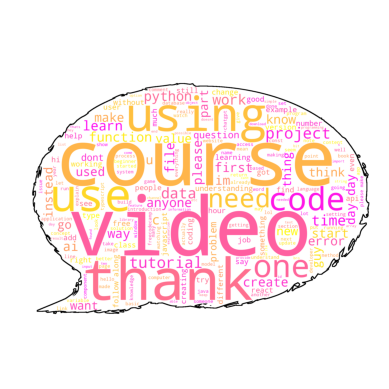

In [41]:
# Define sentiments
sentiments = {'POS':'Greens', 'NEG':'Reds', 'NEU':'spring'}

for sentiment,colormap in sentiments.items():
  display(Markdown(f"## {sentiment}: Example documents"))
  random_examples = comments_df[comments_df['Sentiment_label']==sentiment].sample(n=10)['Comment'].values
  for idx,comment in enumerate(random_examples):
    print(f'Example {idx}: {comment}')
  display(Markdown(f"## {sentiment}: Word cloud"))
  cloud = plot_bag_of_words(sentiment=sentiment,colormap=colormap)
  cloud.to_file(f"wordcloud_{sentiment}.png")


### Distribution of YouTube Comments Over Time Grouped by Sentiment

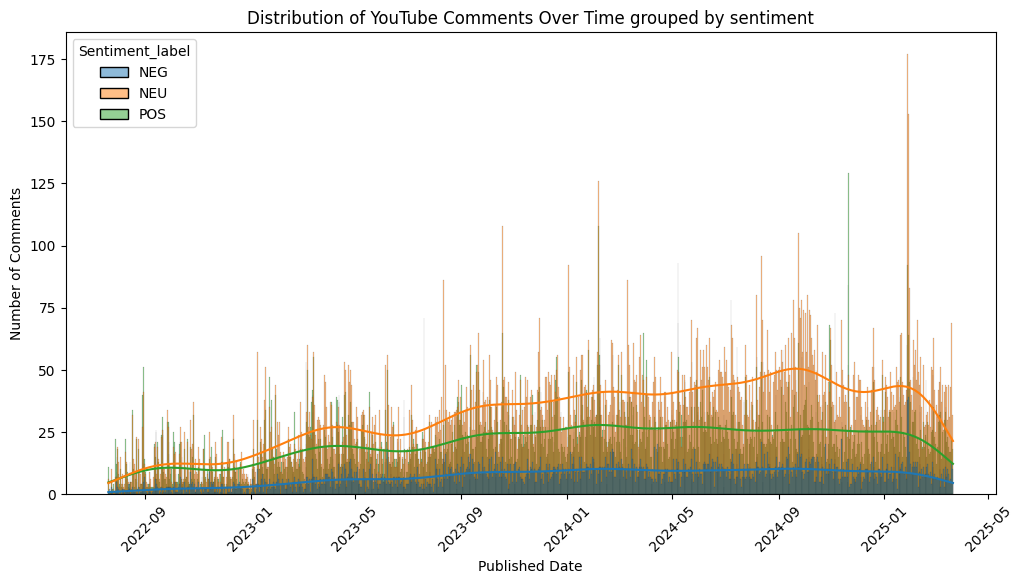

In [42]:
plt.figure(figsize=(12, 6))
sns.histplot(data = comments_df,x='Published_date',hue='Sentiment_label', bins=50, kde=True)
plt.xlabel("Published Date")
plt.ylabel("Number of Comments")
plt.title("Distribution of YouTube Comments Over Time grouped by sentiment")
plt.xticks(rotation=45)
plt.show()

In [43]:
display(Markdown(f"##### Key Metrics"))
for sentiment in sentiments.keys():
  sentiment_len = len(comments_df[comments_df['Sentiment_label']==sentiment])
  total_len = len(comments_df)
  display(Markdown(f"* {sentiment} Sentiments: {sentiment_len}({round(sentiment_len/total_len*100,2)} %) comments"))

##### Key Metrics

* POS Sentiments: 20601(34.66 %) comments

* NEG Sentiments: 7136(12.01 %) comments

* NEU Sentiments: 31699(53.33 %) comments

#### Conclusion

The sentiment analysis reveals the overall tone of viewer engagement. A high proportion of positive sentiment suggests positive reception, whereas negative comments highlight areas for potential improvement.


## Topic Modeling (BERTopic)

To extract meaningful themes, BERTopic was applied separately to each sentiment category:

* Positive Comments: Identifying themes in praises, appreciation, and positive feedback.

* Negative Comments: Highlighting criticisms, complaints, and areas for improvement.

* Neutral Comments: Extracting general discussion topics without strong sentiment.

In [44]:
sent_model_result = {'POS':{},
                     'NEG':{},
                     'NEU':{}}
for sentiment in ['POS','NEG','NEU']:
  print(f'Processing {sentiment} comments')
  print(f'Number of comments: {len(comments_df[comments_df.Sentiment_label==sentiment])}')
  non_emoji_docs_sent = list(comments_df.Comment_no_emojis[comments_df.Sentiment_label==sentiment].astype(str))
  topic_model = BERTopic(nr_topics=11)
  topics, probs = topic_model.fit_transform(non_emoji_docs_sent)
  sent_model_result[sentiment] = {'topics':topics,'probs':probs,'topic_model':topic_model}


Processing POS comments
Number of comments: 20601


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Processing NEG comments
Number of comments: 7136
Processing NEU comments
Number of comments: 31699


For each sentiment:

* After generating topics and their probabilities:

  * We can access the most frequent topics that were generated.

  * Investigate the relationships between topics.

Notes:

* Topic -1 refers to all outliers and should typically be ignored.

* We limit the number of topics to 10 to improve interpretability and ensure meaningful topic extraction using the BERTopic model.


In [45]:
# Define sentiments
sentiments = ['POS', 'NEG', 'NEU']
topic_summary_df = pd.DataFrame()
for sentiment in sentiments:
    display(Markdown(f"## {sentiment}: Sentiment Analysis"))

    topic_model = sent_model_result[sentiment]['topic_model']

    # Get sorted topics
    get_topic_info_sorted = topic_model.get_topic_info().sort_values(by='Count', ascending=False)
    sorted_topics = list(get_topic_info_sorted['Topic'])

    # Remove outlier topic (-1)
    if -1 in sorted_topics:
        sorted_topics.remove(-1)
    display(get_topic_info_sorted)  # Display DataFrame in Jupyter

    # Retrieve the top 2 topics based on their frequency (count)
    top_2_topics = get_topic_info_sorted[get_topic_info_sorted['Topic'].isin(sorted_topics)].reset_index(drop=True).loc[:1]
    # Get the top keywords representing the selected topics
    Top_Keywords = top_2_topics['Representation']
    # Calculate the percentage of comments for the selected topics
    Percentage_of_Comments = round(top_2_topics['Count']/get_topic_info_sorted['Count'].sum()*100,2)
    # Convert Percentage_of_Comments to string and add '%' suffix
    Percentage_of_Comments = Percentage_of_Comments.astype(str) + '%'
    # Create a temporary DataFrame for the sentiment with top keywords and percentage of comments
    sent_topic_summary_df = pd.DataFrame({'Sentiment':sentiment,'Top Keywords':Top_Keywords,'Percentage of Comments':Percentage_of_Comments})
    # Concatenate the temporary DataFrame to the main summary DataFrame
    topic_summary_df = pd.concat([topic_summary_df,sent_topic_summary_df])

    # Get representative docs
    representative_docs = topic_model.get_representative_docs()
    display(Markdown(f"### Key Example Documents per Topic"))
    for topic, examples in representative_docs.items():
        print(f'Topic {topic}:')
        for idx, example in enumerate(examples):
            print(f'Example {idx}: {example}')

    # Generate topic bar chart
    display(Markdown(f"### Top Words per Topic"))
    fig = topic_model.visualize_barchart(topics=sorted_topics)
    fig.write_html(f"{sentiment.lower()}_topics.html")
    display(fig)
    files.download(f"{sentiment.lower()}_topics.html")# Download files

    # Generate topic visualization
    display(Markdown(f"### Topic Clustering Visualization"))
    try:
        fig = topic_model.visualize_topics()
        fig.write_html(f"{sentiment.lower()}_2d.html")
        display(fig)
        files.download(f"{sentiment.lower()}_2d.html")# Download files
    except:
        print('Not enough topics for 2D visualization')

    # Generate heatmap
    display(Markdown(f"### Topic Similarity Heatmap"))
    try:
        fig = topic_model.visualize_heatmap()
        fig.write_html(f"{sentiment.lower()}_heatmap.html")
        display(fig)
        files.download(f"{sentiment.lower()}_heatmap.html")# Download files
    except:
        print('Not enough topics for heatmap')


## POS: Sentiment Analysis

,Topic,Count,Name,Representation,Representative_Docs
0,-1,6772,-1_course_video_thank_thanks,"[course, video, thank, thanks, great, tutorial...","[love video thanks, really great thank, best v..."
1,0,5706,0_course_thank_thanks_great,"[course, thank, thanks, great, tutorial, video...","[great course, thank course, thank great course]"
2,1,3840,1_thank_much_thanks_great,"[thank, much, thanks, great, video, nice, awes...","[thank much, thanks great video, really good v..."
3,2,3194,2_redheart_thank_partypopper_thumbsup,"[redheart, thank, partypopper, thumbsup, thank...","[thank much :red_heart:, thank much :smiling_f..."
4,3,457,3_channel_fcc_accent_english,"[channel, fcc, accent, english, voice, subtitl...","[love channel, love channel, love channel]"
5,4,284,4_proud_india_ali_love,"[proud, india, ali, love, bouali, tunisiatunis...","[love india, proud ali :red_heart::Tunisia:, p..."
6,5,228,5_day_aug_hundredpoints_array,"[day, aug, hundredpoints, array, course, great...",[day 01 18 aug 3440 day 02 19 aug 5108 day 03 ...
7,6,50,6_gracias_muchas_merci_de,"[gracias, muchas, merci, de, excelente, por, e...","[¡gracias, muchas gracias, muchas gracias]"
8,7,31,7_speed_ryzen_playback_gpu,"[speed, ryzen, playback, gpu, better, faster, ...",[nice speed test cudatorch sometimes delays in...
9,8,29,8_stripe_wallet_binance_usdt,"[stripe, wallet, binance, usdt, seed, phrase, ...",[really appreciate efforts quick offtopic ques...


### Key Example Documents per Topic

Topic -1:
Example 0: love video thanks
Example 1: really great thank
Example 2: best video tutorial thanks :party_popper:
Topic 0:
Example 0: great course
Example 1: thank course
Example 2: thank great course
Topic 1:
Example 0: thank much
Example 1: thanks great video
Example 2: really good video thank much
Topic 2:
Example 0: thank much :red_heart:
Example 1: thank much :smiling_face_with_smiling_eyes:
Example 2: thank much :folded_hands::folded_hands:
Topic 3:
Example 0: love channel
Example 1: love channel
Example 2: love channel
Topic 4:
Example 0: love india
Example 1: proud ali :red_heart::Tunisia:
Example 2: proud tunisian :Tunisia: thank ali bouali :red_heart:
Topic 5:
Example 0: day 01 18 aug 3440 day 02 19 aug 5108 day 03 20 aug 11150 day 04 21 aug 13704 day 05 22 aug 20024 day 06 23 aug 24500 day 07 24 aug 31241 day 08 25 aug 35747 day 09 day 10 break practice day 11 28 aug 44628 day 12 29 aug 53234 day 13 30 aug 63315 day 14 30 aug 72022 day 15 31 aug 74959 day 16 01 sep 8

### Top Words per Topic

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Topic Clustering Visualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Topic Similarity Heatmap

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## NEG: Sentiment Analysis

,Topic,Count,Name,Representation,Representative_Docs
0,-1,3018,-1_dont_im_code_like,"[dont, im, code, like, cant, course, video, ge...","[dont understand watch full video code, everyt..."
1,0,2020,0_video_dont_ai_like,"[video, dont, ai, like, understand, time, peop...",[bro really hard understand indian accent pain...
2,1,994,1_error_help_getting_get,"[error, help, getting, get, cant, anyone, im, ...","[code project github cant find anybody help, e..."
3,2,469,2_cryingface_css_facewithtearsofjoy_grinningfa...,"[cryingface, css, facewithtearsofjoy, grinning...","[tailwind worse css, got watch bit hour tutori..."
4,3,200,3_react_javascript_js_typescript,"[react, javascript, js, typescript, nextjs, us...",[angular matured professional framework simple...
5,4,176,4_python_formatter_formatting_installing,"[python, formatter, formatting, installing, pl...",[formatting working follow process please upda...
6,5,101,5_wrong_data_validation_loss,"[wrong, data, validation, loss, number, datase...",[see spare data 02 dataset used validation don...
7,6,93,6_waiting_long_crash_aws,"[waiting, long, crash, aws, crypto, market, cr...","[waiting long time one, long waiting course, w..."
8,7,38,7_donald_art_trump_ai,"[donald, art, trump, ai, racist, looks, like, ...","[donald trump, looks like donald trump, looks ..."
9,8,14,8_route_routes_routing_routeroutlet,"[route, routes, routing, routeroutlet, dynamic...",[using laravel 11 12913 need change returned r...


### Key Example Documents per Topic

Topic -1:
Example 0: dont understand watch full video code
Example 1: everything good cdn part started using things like selflink without explaining anything comes know like copypaste tutorial without depth also please stop using copilot try guess want ruins course experience confusing isnt auto completing part showing code type type something else also explanation tfstate state file auto loaded different env guess quick demo without depth explanation
Example 2: really hard learn anything tutorial know lot work put creating dont think style teaching like
Topic 0:
Example 0: bro really hard understand indian accent pain learn video
Example 1: tried use video learn pandas beginners made 5 minutes video getting frustrated jumps right project doesnt say go sign know says project conjunction data wars freecodecamp figure follow along data wars tried using first link get project link take first project working english words im already point dont want use freecodecamp anymore isnt first time 

### Top Words per Topic

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Topic Clustering Visualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Topic Similarity Heatmap

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## NEU: Sentiment Analysis

,Topic,Count,Name,Representation,Representative_Docs
0,-1,10116,-1_video_like_course_keyboard,"[video, like, course, keyboard, code, please, ...",[important notice hello sir student want see f...
1,0,9283,0_course_ai_video_using,"[course, ai, video, using, please, code, data,...",[:bullseye: key takeaways quick navigation 000...
2,1,9051,1_day_thanks_thank_first,"[day, thanks, thank, first, comment, like, fac...",[progress others done 4600 day 1 012900 day 2 ...
3,2,1113,2_error_aws_docker_file,"[error, aws, docker, file, azure, anyone, help...",[sir first run docker compose error facing elt...
4,3,920,3_keyboard_css_player_tailwind,"[keyboard, css, player, tailwind, html, scisso...",[5945 service class :star: contents :star: :ke...
5,4,725,4_de_que_no_hindi,"[de, que, no, hindi, hai, en, vai, nada, se, f...",[du nada de vc vai querer ir aí na casa pai de...
6,5,255,5_image_file_download_csv,"[image, file, download, csv, images, thumbnail...","[csv file, csv file, link csv file]"
7,6,93,6_tunisiatunisiatunisiatunisiatunisia_tunisiat...,"[tunisiatunisiatunisiatunisiatunisia, tunisiat...","[big ali bouali :Tunisia::Tunisia:, thank sir ..."
8,7,67,7_let_return_string_const,"[let, return, string, const, plagiarism, regex...",[think best approach dynamic programming probl...
9,8,54,8_array_readonly_enum_push,"[array, readonly, enum, push, value, enumerati...","[push values array readonly, 136 yes push valu..."


### Key Example Documents per Topic

Topic -1:
Example 0: important notice hello sir student want see full video please add option video track youtube channel happen watch video language like hindi tamil improvement video track new youtube please add quickly see video mr beast added video tracks watch videos language thank
Example 1: key takeaways quick navigation 0000 introduction cs50 course dr david malans background 0712 transition c programming language week one 1809 exploring different number systems 2429 introducing volunteers represent bits 3110 bits bytes computer memory 3601 decoding text messages using ascii 4359 representation emojis skin tones unicode 4604 efficient design unicode complex emoji representations 011700 scratch interface basics 012520 exploring scratch features 013904 interactive programming video sensing introduction using scratch programming creating program synthesized speech explaining concept functions programming implementing conditional behavior scratch 015318 iterative development scratc

### Top Words per Topic

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Topic Clustering Visualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Topic Similarity Heatmap

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

As to be expected, the biggest topic the model classified

In [50]:
display(Markdown(f"#### Key Metrics"))
display(Markdown(f"##### Top 2 Topics Extracted from Each Sentiment with Keywords and Comment Distribution"))
display(Markdown(topic_summary_df.reset_index(drop=True).to_markdown()))

#### Key Metrics

##### Top 2 Topics Extracted from Each Sentiment with Keywords and Comment Distribution

|    | Sentiment   | Top Keywords                                                                                                           | Percentage of Comments   |
|---:|:------------|:-----------------------------------------------------------------------------------------------------------------------|:-------------------------|
|  0 | POS         | ['course', 'thank', 'thanks', 'great', 'tutorial', 'video', 'freecodecamp', 'react', 'good', 'im']                     | 27.7%                    |
|  1 | POS         | ['thank', 'much', 'thanks', 'great', 'video', 'nice', 'awesome', 'amazing', 'good', 'content']                         | 18.64%                   |
|  2 | NEG         | ['video', 'dont', 'ai', 'like', 'understand', 'time', 'people', 'course', 'really', 'accent']                          | 28.31%                   |
|  3 | NEG         | ['error', 'help', 'getting', 'get', 'cant', 'anyone', 'im', 'code', 'work', 'data']                                    | 13.93%                   |
|  4 | NEU         | ['course', 'ai', 'video', 'using', 'please', 'code', 'data', 'like', 'get', 'use']                                     | 29.28%                   |
|  5 | NEU         | ['day', 'thanks', 'thank', 'first', 'comment', 'like', 'facewithtearsofjoy', 'grinningfacewithsweat', 'one', 'course'] | 28.55%                   |

### Conclusion

By splitting topic modeling based on sentiment, we gain a clearer understanding of what drives positive engagement, what issues users face, and what general discussions are taking place. These insights can inform content improvements and audience engagement strategies.

Write file to csv

In [47]:
comments_df.to_csv('comments_df.csv')

In [48]:
files.download('comments_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Final Conclusion

The analysis of YouTube comments on the freeCodeCamp channel provides valuable insights into user engagement, sentiment trends, and prevalent discussion themes. The findings suggest that [insert summary of overall sentiment], with topics such as [mention key themes] driving the most discussions. These insights can help optimize content strategies and improve audience engagement.

## Future Work

* Considering non-English comments by translating them during preprocessing or using multilingual models.

* Building a Streamlit/Tableau dashboard for interactive exploration.


* Extending the analysis to cover all videos and comments.


* Expanding the analysis to include replies for deeper engagement insights.

* Conducting a deeper analysis, including sentiment trends over time.

* Exploring the correlation between comment sentiment and video engagement metrics (likes, shares, watch time).

* Analyzing sentiment by individual video to determine what content performs best and why.
